## **Name:** Atharv Gupta

## **Computing ID:** xur8hs

used ChatGPT 4o

# Lab 2: Machine Learning Evaluation (100 Points)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1q0ruU6KlmFv4wNBSGh73e4B6gGNUHy2E?usp=sharing)

In [ ]:
pip install scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pyarrow

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **Candidate Messy Datasets for Part 1:**
* Tidy Tuesday
   * https://github.com/rfordatascience/tidytuesday/tree/main/data
* Hugging Face
   * https://huggingface.co/datasets/nateraw/airplane-crashes-and-fatalities
* Kaggle
   * https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv
   * https://www.kaggle.com/datasets/mahnazarjmand/breast-cancer-data?resource=download




## Part 1: KNN and Regression Model Evaluation (30 Points)

## **Question 1 (15 points):**
## Read in or load a dataset as a Pandas DataFrame with at least 5 features (columns) and a categorical target column.

## Create a new DataFrame called clean_df that incorporates these preprocessing steps in **separate cells**. Complete each step regardless of if they have no effect on your data:
0. Call dtypes on the DataFrame
1. Drop rows that are completely empty
2. Replace missing values ("null", 0, empty strings) with proper NaNs
3. Impute NaNs using any method that sklearn supports
4. Drop any features that seem highly uncorrelated to your target so long as you still retain at least 5 features
5. Normalize and/or scale numerical columns using any method that sklearn supports
6. Encode any categorical columns using appropriate method (ordinal, one hot encoding)
7. Any additional preprocessing required for your data (ie: removing dollar signs from string columns and casting it is a float)

In [ ]:
df= pd.read_csv('/content/food_coded.csv')

In [ ]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [ ]:
df.dtypes

,0
GPA,object
Gender,int64
breakfast,int64
calories_chicken,int64
calories_day,float64
...,...
type_sports,object
veggies_day,int64
vitamins,int64
waffle_calories,int64


In [ ]:
df=df.dropna(how='all')

In [ ]:
print(df.isnull().sum())

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         26
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64


In [ ]:

# Replace empty strings and common text placeholders for null values with NaN
df.replace(["", "null", "NULL", "None", "none", "NaN", "nan", "not sure"], np.nan, inplace=True)

# Display the number of missing values in each column after replacement
print(df.isnull().sum())
df


GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         34
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,NaN,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,NaN,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,NaN,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


In [ ]:

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_columns)

# Convert all numerical columns to numeric, forcing non-numeric values to NaN
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Check if NaN values were introduced (which means non-numeric values were found)
print(df.isnull().sum())


Numerical Columns: Index(['Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
       'comfort_food_reasons_coded.1', 'cuisine', 'diet_current_coded',
       'drink', 'eating_changes_coded', 'eating_changes_coded1', 'eating_out',
       'employment', 'ethnic_food', 'exercise', 'father_education',
       'fav_cuisine_coded', 'fav_food', 'fries', 'fruit_day', 'grade_level',
       'greek_food', 'healthy_feeling', 'ideal_diet_coded', 'income',
       'indian_food', 'italian_food', 'life_rewarding', 'marital_status',
       'mother_education', 'nutritional_check', 'on_off_campus',
       'parents_cook', 'pay_meal_out', 'persian_food',
       'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories'],
      dtype='object')
GPA                  2
Gender               0
breakfast            0
calories_chicken     0
cal

In [ ]:
from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute missing values in numeric columns with Mean
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute missing values in categorical columns with Most Frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])



In [ ]:
print(df.columns)

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [ ]:
df= df[['GPA','Gender','calories_day','exercise','fav_cuisine_coded','nutritional_check','fruit_day']]

In [ ]:
df.dtypes

,0
GPA,object
Gender,float64
calories_day,float64
exercise,float64
fav_cuisine_coded,float64
nutritional_check,float64
fruit_day,float64


In [ ]:
df['GPA'].value_counts()

,count
GPA,
3.5,15
3,11
3.7,10
3.2,10
3.3,9
3.4,9
3.9,7
3.6,7
3.8,6


In [ ]:
df = df[pd.to_numeric(df['GPA'], errors='coerce').notnull()]


In [ ]:
df

,GPA,Gender,calories_day,exercise,fav_cuisine_coded,nutritional_check,fruit_day
0,2.4,2.0,3.028302,1.0,3.0,5.0,5.0
1,3.654,1.0,3.000000,1.0,1.0,4.0,4.0
2,3.3,1.0,4.000000,2.0,1.0,4.0,5.0
3,3.2,1.0,3.000000,3.0,3.0,2.0,4.0
4,3.5,1.0,2.000000,1.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...
120,3.5,1.0,4.000000,2.0,1.0,5.0,5.0
121,3,1.0,2.000000,2.0,2.0,3.0,4.0
122,3.882,1.0,3.028302,2.0,4.0,3.0,4.0
123,3,2.0,4.000000,1.0,1.0,4.0,5.0


In [ ]:
df['GPA'].value_counts()

,count
GPA,
3.5,15
3,11
3.7,10
3.2,10
3.4,9
3.3,9
3.9,7
3.6,7
3.8,6


In [ ]:
df['GPA']=df['GPA'].astype(float)
df.dtypes


,0
GPA,float64
Gender,float64
calories_day,float64
exercise,float64
fav_cuisine_coded,float64
nutritional_check,float64
fruit_day,float64


In [ ]:
df

,GPA,Gender,calories_day,exercise,fav_cuisine_coded,nutritional_check,fruit_day
0,2.400,2.0,3.028302,1.0,3.0,5.0,5.0
1,3.654,1.0,3.000000,1.0,1.0,4.0,4.0
2,3.300,1.0,4.000000,2.0,1.0,4.0,5.0
3,3.200,1.0,3.000000,3.0,3.0,2.0,4.0
4,3.500,1.0,2.000000,1.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...
120,3.500,1.0,4.000000,2.0,1.0,5.0,5.0
121,3.000,1.0,2.000000,2.0,2.0,3.0,4.0
122,3.882,1.0,3.028302,2.0,4.0,3.0,4.0
123,3.000,2.0,4.000000,1.0,1.0,4.0,5.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to normalize
numerical_columns = ["GPA", "calories_day", "exercise", "nutritional_check", "fruit_day"]

# Initialize MinMaxScaler from sklearn
scaler = MinMaxScaler()

# Apply MinMaxScaler to normalize numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [ ]:
df

,GPA,Gender,calories_day,exercise,fav_cuisine_coded,nutritional_check,fruit_day
0,0.111111,2.0,0.514151,0.0,3.0,1.00,1.00
1,0.807778,1.0,0.500000,0.0,1.0,0.75,0.75
2,0.611111,1.0,1.000000,0.5,1.0,0.75,1.00
3,0.555556,1.0,0.500000,1.0,3.0,0.25,0.75
4,0.722222,1.0,0.000000,0.0,1.0,0.50,0.75
...,...,...,...,...,...,...,...
120,0.722222,1.0,1.000000,0.5,1.0,1.00,1.00
121,0.444444,1.0,0.000000,0.5,2.0,0.50,0.75
122,0.934444,1.0,0.514151,0.5,4.0,0.50,0.75
123,0.444444,2.0,1.000000,0.0,1.0,0.75,1.00


remaining columns:
GPA
Gender
Calories_day (importance of consuming calories per day - 1 least aware, 4- most aware)
Exercise (how often does one exercise 1 - most, 5 least)
fav_cuisine_coded (1 through 8 for different cuisines)
fruit_day (how likely to eat fruit in a regular dat 1- most unlikely, 5- most likely)
nutritional_check (1 - never, 5 - on everything)

In [ ]:
df

,GPA,Gender,calories_day,exercise,fav_cuisine_coded,nutritional_check,fruit_day
0,0.111111,2.0,0.514151,0.0,3.0,1.00,1.00
1,0.807778,1.0,0.500000,0.0,1.0,0.75,0.75
2,0.611111,1.0,1.000000,0.5,1.0,0.75,1.00
3,0.555556,1.0,0.500000,1.0,3.0,0.25,0.75
4,0.722222,1.0,0.000000,0.0,1.0,0.50,0.75
...,...,...,...,...,...,...,...
120,0.722222,1.0,1.000000,0.5,1.0,1.00,1.00
121,0.444444,1.0,0.000000,0.5,2.0,0.50,0.75
122,0.934444,1.0,0.514151,0.5,4.0,0.50,0.75
123,0.444444,2.0,1.000000,0.0,1.0,0.75,1.00


In [ ]:
df["Gender"] = df["Gender"].map({1: 0, 2: 1})


In [ ]:
clean_df=df

In [ ]:
clean_df

,GPA,Gender,calories_day,exercise,fav_cuisine_coded,nutritional_check,fruit_day
0,0.111111,1,0.514151,0.0,3.0,1.00,1.00
1,0.807778,0,0.500000,0.0,1.0,0.75,0.75
2,0.611111,0,1.000000,0.5,1.0,0.75,1.00
3,0.555556,0,0.500000,1.0,3.0,0.25,0.75
4,0.722222,0,0.000000,0.0,1.0,0.50,0.75
...,...,...,...,...,...,...,...
120,0.722222,0,1.000000,0.5,1.0,1.00,1.00
121,0.444444,0,0.000000,0.5,2.0,0.50,0.75
122,0.934444,0,0.514151,0.5,4.0,0.50,0.75
123,0.444444,1,1.000000,0.0,1.0,0.75,1.00


In [ ]:
clean_df

,GPA,Gender,calories_day,exercise,fav_cuisine_coded,nutritional_check,fruit_day
0,0.111111,1,0.514151,0.0,3.0,1.00,1.00
1,0.807778,0,0.500000,0.0,1.0,0.75,0.75
2,0.611111,0,1.000000,0.5,1.0,0.75,1.00
3,0.555556,0,0.500000,1.0,3.0,0.25,0.75
4,0.722222,0,0.000000,0.0,1.0,0.50,0.75
...,...,...,...,...,...,...,...
120,0.722222,0,1.000000,0.5,1.0,1.00,1.00
121,0.444444,0,0.000000,0.5,2.0,0.50,0.75
122,0.934444,0,0.514151,0.5,4.0,0.50,0.75
123,0.444444,1,1.000000,0.0,1.0,0.75,1.00


## **Question 2 (5 points):**
## Implement a train test split with a ratio of your choosing for the training and test datasets.

## Instantiate and fit a vanilla (default) logistic regression classifier and a K-Nearest Neighbor model on your clean datasets and target.



my target feature is fav_cuisine_coded

In [ ]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
X = clean_df.drop(columns=["fav_cuisine_coded"])  # Features (drop target)
y = clean_df["fav_cuisine_coded"]  # Target (categorical variable)

# Split into Training (80%) and Testing (20%) Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


enountered some NaN values, imputed with mean again here

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression Model (default settings)
log_reg = LogisticRegression(max_iter=500)#number of simulations

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN Model (default settings)
knn = KNeighborsClassifier(n_neighbors=5)  # Default: 5 neighbors

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions
log_reg_preds_vanilla = log_reg.predict(X_test)
knn_preds_vanilla = knn.predict(X_test)

# Calculate accuracy
log_reg_acc = accuracy_score(y_test, log_reg_preds_vanilla)
knn_acc = accuracy_score(y_test, knn_preds_vanilla)

# Print model accuracy
print(f"Logistic Regression Accuracy: {log_reg_acc:.2f}")
print(f"KNN Accuracy: {knn_acc:.2f}")


Logistic Regression Accuracy: 0.48
KNN Accuracy: 0.32


## **Question 3 (5 points):**
## Next, familiarize yourself with the sklearn documentation for each model and their parameters. Pick 2 parameters that you want to adjust from their default values in each of the models.
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## Instantiate and fit a logistic regression classifier and a K-Nearest Neighbor model with these **updated** parameters on your clean datasets and target.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Train Logistic Regression with updated parameters
log_reg = LogisticRegression(C=2.0,fit_intercept=False, max_iter=500)
log_reg.fit(X_train, y_train)

# Train KNN with updated parameters
knn = KNeighborsClassifier(n_neighbors=7, weights="distance")
knn.fit(X_train, y_train)

# Predictions
log_reg_preds = log_reg.predict(X_test)
knn_preds = knn.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score

log_reg_acc = accuracy_score(y_test, log_reg_preds)
knn_acc = accuracy_score(y_test, knn_preds)

print(f"Updated Logistic Regression Accuracy: {log_reg_acc:.2f}")
print(f"Updated KNN Accuracy: {knn_acc:.2f}")


Updated Logistic Regression Accuracy: 0.44
Updated KNN Accuracy: 0.36


## **Question 4 (5 points):**
## Compile the following metrics for all 4 of your models into one DataFrame called metrics_df. Each model should have each metric reported.


1. Accuracy Score
2. Precision
3. Sensitivity
4. Specificity
5. F1 Score


## The first column of metrics_df has been created for you.

In [ ]:
model_strings = ["Default Logistic Regression", "Default KNN", "Updated Logistic Regression", "Updated KNN"]
metrics_df = pd.DataFrame(index=model_strings)
metrics_df["Accuracy Score"] = [0, 0, 0, 0]
metrics_df

,Accuracy Score
Default Logistic Regression,0
Default KNN,0
Updated Logistic Regression,0
Updated KNN,0


In [ ]:
new_list=[log_reg_preds_vanilla,knn_preds_vanilla,log_reg_preds,knn_preds]
new_metric_df=[]
for model in new_list:
  accuracy=accuracy_score(y_test,model)
  precision=precision_score(y_test,model,average='weighted')
  sensitivity=recall_score(y_test,model,average='weighted')
  specificity=recall_score(y_test,model,average='weighted',pos_label=0)#pos_label=0 makes it for the negative class
  f1=f1_score(y_test,model,average='weighted')
  metrics_list=[accuracy,precision,sensitivity,specificity,f1]
  new_metric_df.append(metrics_list)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that

In [ ]:
new_metric_df

[[0.48, 0.2304, 0.48, 0.48, 0.3113513513513514],
 [0.32, 0.244, 0.32, 0.32, 0.27555555555555555],
 [0.44, 0.22956521739130437, 0.44, 0.44, 0.3017142857142857],
 [0.36, 0.25955555555555554, 0.36, 0.36, 0.29811965811965807]]

In [ ]:
pd.DataFrame(new_metric_df,columns=['Accuracy Score','Precision','Sensitivity','Specificity','F1 Score'],index=model_strings)

,Accuracy Score,Precision,Sensitivity,Specificity,F1 Score
Default Logistic Regression,0.48,0.230400,0.48,0.48,0.311351
Default KNN,0.32,0.244000,0.32,0.32,0.275556
Updated Logistic Regression,0.44,0.229565,0.44,0.44,0.301714
Updated KNN,0.36,0.259556,0.36,0.36,0.298120


sensitivity and specificity are types of recall.

## Part 2: KNN and Regression Model Evaluation (30 Points)

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and NN to predict values (i.e. "see/read").

The MNIST dataset target value is the number represented by the handwritten digit (ie: 1 to 9).

Run the following cells to download the images and encode them.

In [ ]:
from keras.datasets import mnist

train, test = mnist.load_data('mnist.db')
X_train, y_train = train
X_test, y_test = test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 19

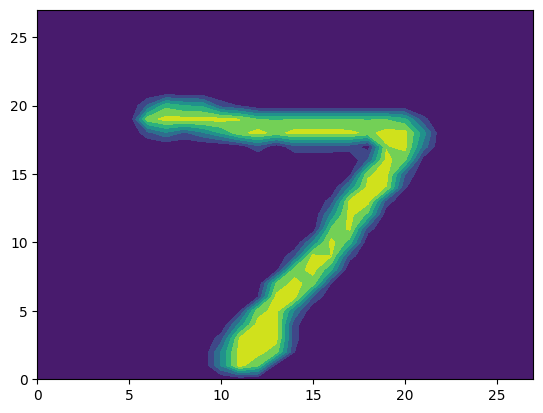

In [ ]:

item_index = 0
print(y_test[item_index],'\n') # Print the label
print(X_test[item_index],'\n') # Print the matrix of values
plt.contourf(np.rot90(X_test[item_index].transpose())) # Make a contour plot of the matrix values
plt.show()

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  77 254
  107   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  19 227 254
  254   9   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  81 254 254
  165   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   

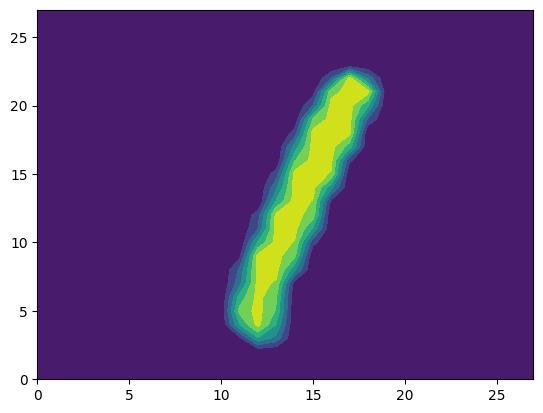

In [ ]:
item_index = 5
print(y_test[item_index],'\n') # Print the label
print(X_test[item_index],'\n') # Print the matrix of values
plt.contourf(np.rot90(X_test[item_index].transpose())) # Make a contour plot of the matrix values
plt.show()

We will use an already denoised and preprocessed version of the training data.

In [ ]:
Z_train = pd.read_parquet('/content/Z_train.parquet', engine='pyarrow')
Z_test = pd.read_parquet('/content/Z_test.parquet', engine='pyarrow')

## **Question 1 (5 points):**
## What is the shape of X_train and X_test?

## What is the shape of X_train[i] and X_test[i] for each index i?
Hint: All elements of X_train and X_test have the same shape, so you can report the shape of just the first element (i=0)

## What is the shape of Z_train and Z_test?

## What is the shape of y_train and y_test?

## Call the shape function in the code cell below and list your final answers in a text markdown cell.

In [ ]:
X_train.shape
X_test.shape
print(X_train[0].shape)
print(X_test[0].shape)
print(Z_train.shape)
print(Z_test.shape)
print(y_train.shape)
print(y_test.shape)


(28, 28)
(28, 28)
(60000, 784)
(10000, 784)
(60000,)
(10000,)


Shape of X_train is (60000,28,28)

Shape of X_test is (10000,28,28)

Shape of X_train[i] is (28,28)

Shape of X_test[i] is (28,28)

Shape of Z_train is (60000,784)

Shape of Z_test is (10000,784)

Shape of y_train is (60000, )

Shape of y_test is (10000, )

## **Question 2 (5 points):**
## Run the cell below to determine the optimal k number of neighbors from the outputted graph. Report the optimal number and why you believe it is the optimal number in the text markdown cell.

In [ ]:
k_bar = 10
k_grid = np.arange(0, k_bar) # The range of k's to consider
accuracy = np.zeros(k_bar) # Empty list of accuracies for each k to update

Fitting k=0
Fitting k=1
Fitting k=2
Fitting k=3
Fitting k=4
Fitting k=5
Fitting k=6
Fitting k=7
Fitting k=8
Fitting k=9
[2]


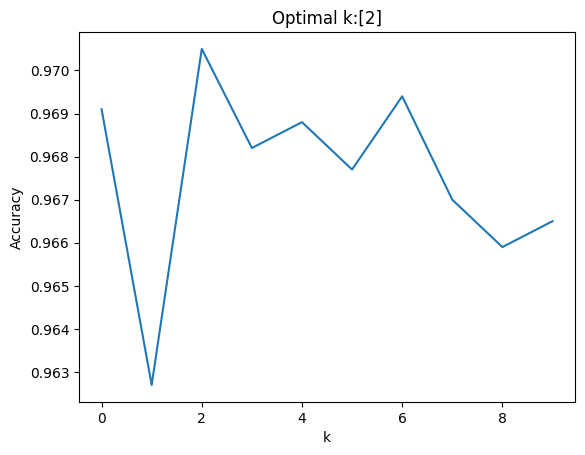

In [ ]:
for k in range(k_bar):
    print(f"Fitting k={k}")
    knn = KNeighborsClassifier(n_neighbors=k+1)
    predictor = knn.fit(Z_train.values,y_train)
    accuracy[k] = knn.score(Z_test.values,y_test)

accuracy_max = np.max(accuracy) # Highest recorded accuracy
max_index = np.where(accuracy==accuracy_max)
k_star = k_grid[max_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),accuracy) # Plot accuracy by k
plt.xlabel("k")
plt.title("Optimal k:"+str(k_star))
plt.ylabel('Accuracy')
plt.show()

the optimal number of neighbours is 3 as it has the highest level of accuracy around 0.97, when k = 2 better than all other values of k from 0 to 9. The number of neighbours are defined as k+1 in our KNeighboursClassifier.

## **Question 3 (10 points):**
## Instantiate and fit a KNN classifier with the optimal number of neighbors from above. Call predict on this KNN model using Z_test. Plot a confusion matrix for the KNN's performance on the test dataset using sklearn's ConfusionMatrixDisplay function.

## In a text markdown cell, explain which mistakes are most likely according to your confusion matrix. Which digits are more likely to be confused for each other? Do you find any interesting patterns?
Write a minimum of 5 sentences.

In [ ]:
# Train a kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Z_train, y_train)

# Predicting on the test dataset
Z_pred = knn.predict(Z_test)

<Figure size 1000x1000 with 0 Axes>

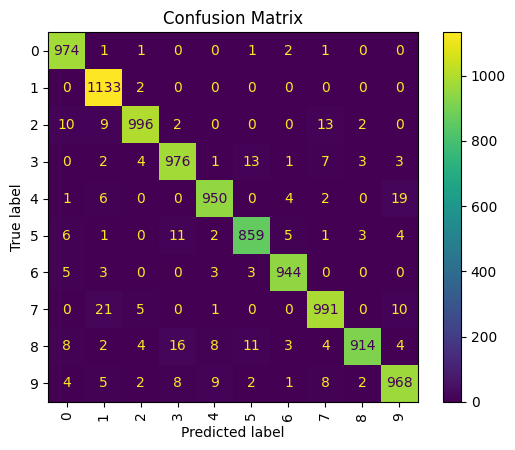

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, Z_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


Most mistakes are likely to happen between 7 & 1 and 4 & 9, as they have the highest value of 21 and 19, respectively. 8 & 3 also have a high likelihood of being mistaken. These patterns arise due to the way these numbers are handwritten, the straight of 7 being confused as 1, or the bottome curved line of 8 being confused as 3. For 9 and 4, if seen from a distance, they look pretty similar, just that 9 looks like a curved 4.

An interesting pattern I saw was that 7 is being confused as 1 more often than 1 being confused as 7, which I thought should be the same.

## **Question 4 (10 points):**
## ROC curves are typically used to distinguish between two classes by plotting the true positive rate (TPR) against the false positive rate (FPR) at different threshold settings. We will recode the target labels to be only 2 classes: "8" or "not 8"

## Fit a new KNN using binary_y_train and call predict using binary_y_test. Plot the ROC curve and print the AUC score for the new binary data whose code is below.

## Write 2 sentences on how to interpret the resulting ROC curve.

In [ ]:
def recode_array(arr, value):
  recoded = np.where(arr == value, 1, 0)
  return recoded

In [ ]:
binary_y_train = recode_array(y_train, 8)
binary_y_test = recode_array(y_test, 8)

In [ ]:
# Original target: all digits 0 to 9
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# New target: all values are 1 (digit 8) or 0 (all other digits)
binary_y_train

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Train a kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Z_train, binary_y_train)

# Predicting on the test dataset
y_pred = knn.predict_proba(Z_test)[:, 1]  # Probability of being in the positive class

In [ ]:
fpr, tpr, _ = roc_curve(binary_y_test, y_pred)
roc_auc = auc(fpr, tpr)

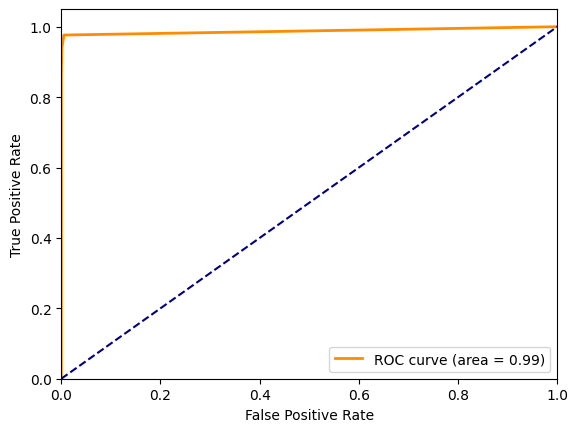

In [ ]:
# Plotting ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(roc_auc)

0.9879169508483592


The ROC curve shows that the model is really good at separating 8s from all the other digits. Since the AUC is 0.99, it means the model is super accurate at ranking which images are actually 8s across a range of thresholds.


## Part 3: Sampling and Cross Validation (40 points)

We will use the following synthetic dataset to explore cross validation on.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## **Question 1 (5 points):** Fit a vanilla KNN classifier on the training set and evaluate (predict) on the test set. Store the accuracy of this model in a variable called test_score.



In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
test_score=knn.score(X_test,y_test)

In [ ]:
print (test_score)

0.9033333333333333



## **Question 2 (10 points):**
## Perform 10-fold cross-validation and compare the results of single split vs. 10-fold cross-validation by plotting accuracy (y-axis) against fold number (x-axis).

## Describe the effect of different fold numbers on the results of cross validation in a text markdown cell and if the results are expected. Give the average accuracy of CV scores across all folds.
Write a minimum of 2 sentences.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import warnings

In [ ]:
cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

In [ ]:
cv_scores

array([0.92857143, 0.9       , 0.98571429, 0.81428571, 0.87142857,
       0.91428571, 0.87142857, 0.92857143, 0.91428571, 0.95714286])

In [ ]:
cv_avg=cv_scores.mean()
print(f"10-Fold CV Average Accuracy: {cv_avg:.4f}")

10-Fold CV Average Accuracy: 0.9086


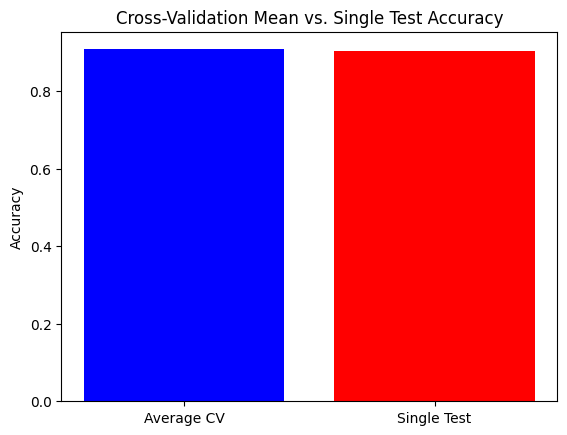

In [ ]:
# Plotting CV and single test score for comparison
plt.bar(['Average CV', 'Single Test'], [np.mean(cv_scores), test_score], color=['blue', 'red'])
plt.ylabel('Accuracy')
plt.title('Cross-Validation Mean vs. Single Test Accuracy')
plt.show()

In this, I see that the number of folds dont have an effect on the accuracy (its the same), I did not expect these results.

Average Accuracy across all folds is 0.9086

## **Question 3 (5 points):** ##
## Modify the plot above and add:
1. A horizontal static red line corresponding to the single split model accuracy
2. A horizontal green line corresponding to the average CV fold accuracy

## You may use the following code to achieve these:
> plt.axhline(y=test_score, color='r', linestyle='--', label='Single Test Score')

> plt.axhline(y=np.mean(cv_scores), color='g', linestyle='-', label='Average CV Score')



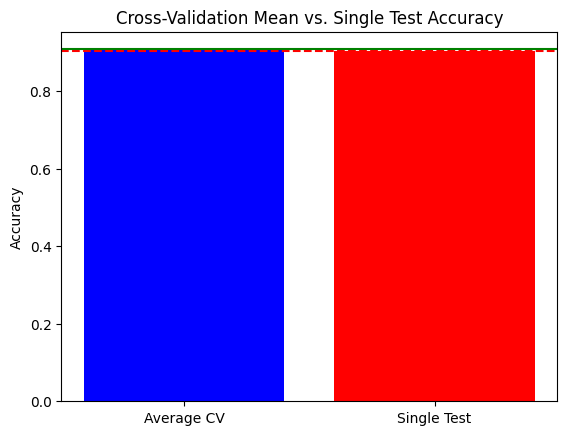

In [ ]:

# Plotting CV and single test score for comparison
plt.bar(['Average CV', 'Single Test'], [np.mean(cv_scores), test_score], color=['blue', 'red'])
plt.axhline(y=test_score, color='r', linestyle='--', label='Single Test Score')
plt.axhline(y=np.mean(cv_scores), color='g', linestyle='-', label='Average CV Score')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Mean vs. Single Test Accuracy')
plt.show()

## **Question 4 (10 points):**
## Implement 5-fold cross-validation on a dataset of your choice. Complete any necessary preprocessing (you may reuse the dataset from Part 1).

## Implement a train-test split and instantiate a classification model of your choice. Call predict on (evaluate) both a single-split and 5-fold CV model.

doing this for the same food_coded dataset that I used in part 1. Will be using clean_df as that has been cleaned.

In [ ]:
df_food = clean_df

In [ ]:
df_food
X=df.drop(columns=["fav_cuisine_coded"])
y=df["fav_cuisine_coded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
test_score=knn.score(X_test,y_test)#technically called predict (evaluate) using knn.score

In [ ]:
print (test_score)

0.40540540540540543


In [ ]:
cv_scores_food = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
cv_food_avg=cv_scores_food.mean()
print(f"5-Fold CV Average Accuracy: {cv_food_avg:.4f}")

5-Fold CV Average Accuracy: 0.3882


## **Question 5 (10 points):**
## Finally, create the same plot as in Question 3 to compare single-split with CV performance on your chosen dataset.

## The plot should have Fold Number on the x-axis and Accuracy on the y-axis. Include a horizontal red line for the single-split accuracy and a horizontal green line for the average CV fold score.

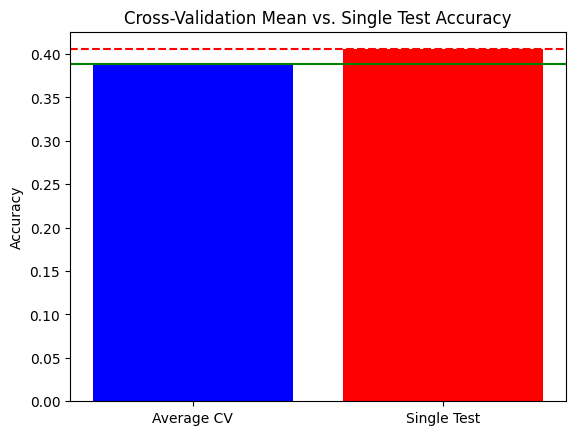

In [ ]:

# Plotting CV and single test score for comparison
plt.bar(['Average CV', 'Single Test'], [np.mean(cv_scores_food), test_score], color=['blue', 'red'])
plt.axhline(y=test_score, color='r', linestyle='--', label='Single Test Score')
plt.axhline(y=np.mean(cv_scores_food), color='g', linestyle='-', label='Average CV Score')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Mean vs. Single Test Accuracy')
plt.show()

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.

Atharv Gupta